In [1]:
import numpy as np
import os

In [2]:
from firefly.data_reader import ArrayReader

don't have phil's colormaps


In [3]:
from firefly.data_reader import FIREreader,SimpleFIREreader,TweenParams
from abg_python.galaxy.gal_utils import Galaxy

In [4]:
import sys

In [5]:
sys.path.insert(0, '/Users/ageller/VISUALIZATIONS/Firefly')
sys.path.insert(0,'/Users/agurvich/research/repos/firefly/src')

In [6]:
galaxy = Galaxy('m12b_res57000',600)
galaxy.extractMainHalo(use_saved_subsnapshots=False)

Couldn't find a metadata file... for
 Metadata object at /Users/agurvich/scratch/data/metal_diffusion/m12b_res57000/metadata/meta_Galaxy_600.hdf5
Tracing the rockstar halo files with fancy:True and None Gyr smoothing.
No rstar 1/2 in halo or metadata files, we will need to calculate it ourselves.
Loading star particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Failed to open saved sub-snapshots AssertionError('Told not to use saved sub-snapshots')
Loading gas particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Loading dark matter particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Reorienting...
Done.
extract_halo_inner(m12b_res57000 at 600,){'orient_stars': True, 'use_saved_subsnapshots': False} 10.56 s elapsed
Snapshot memory free


(12.27201256901771,
 True,
 13.610546783496492,
 -23.753615253930974,
 331.60968,
 2.454402513803542,
 140.56429531755958)

In [7]:
thetas = np.arange(0,360,1)
xs = np.sin(thetas/180*np.pi)*(-1e4)
zs = np.cos(thetas/180*np.pi)*(-1e4)
coords = np.zeros((thetas.size,3))
coords[:,0] = xs
coords[:,-1] = zs

my_tween = TweenParams(coords,duration=10)

In [8]:
## create a FIRE reader object
reader = FIREreader(
    ## path to directory containing (optionally multiple) .hdf5 files
    snapdir = "/Users/agurvich/research/snaps/metal_diffusion/m12b_res57000/output/",
    ## the snapshot number, best to provide separately in order to disambiguate
    snapnum = 600,
    ## particle types one would like to extract from .hdf5 files
    ptypes=[0,4,1,2],
    ## what to call them in the UI
    UInames=['Gas','Stars','HRDM','LRDM'],
    ## by what factor would we like to reduce the data for performance stability and disk space concerns
    decimation_factors=[10,1000,1000,1000],
    ## what fields would we like to extract
    fields=['Density','Temperature','AgeGyr','GCRadius'],
    ## do we want to take the magnitude of any of these fields?
    ## do we want to take the log? 
    logFlags=[True,True,False,False],
    ## which fields do we want to be able to filter on?
    filterFlags=[True,True,True,True],
    ## which fields do we want to be able to colormap by?
    colormapFlags=[True,True,True,True],
    radiusFlags=[False,True,True,False],
    ## where should the output .json files be saved to? 
    ##  if a relative path is given, like here, saves to $HOME/<JSONdir>
    ##  and creates a soft-link to firefly/static/data
    JSONdir=os.path.abspath(os.path.join(os.getcwd(),'..','static','data','FIRESampleData')),
    ## overwrite the existing startup.json file
    write_startup=True,
    clean_JSONdir=True,
    tweenParams=my_tween)

## fetch data from .hdf5 files
reader.loadData(
    com=galaxy.scom,
    vcom=galaxy.sub_snap['vscom'])

Loading ptype 2
Loading ptype 1
Loading ptype 4
Loading ptype 0


array([Gas - 622573/6225729 particles - 4 tracked fields,
       Stars - 3265/3264723 particles - 3 tracked fields,
       HRDM - 9324/9323040 particles - 2 tracked fields,
       LRDM - 3043/3042265 particles - 2 tracked fields], dtype=object)

In [9]:
del galaxy.sub_snap
del galaxy.sub_star_snap
del galaxy.sub_dark_snap

In [16]:
reader.settings['start_tween'] = True

In [17]:
reader.settings['camera'] = [0,0,-1e4]
i=4

In [18]:
dec_factorss = []
dec_factorss += [[1e5,1e6,1e6,1e6]]
dec_factorss += [[1e4,1e6,1e6,1e6]]
dec_factorss += [[1e3,1e6,1e6,1e6]]
dec_factorss += [[1e2,1e6,1e6,1e6]]
dec_factorss += [[1e1,1e6,1e6,1e6]]
dec_factorss += [[1e0,1e6,1e6,1e6]]
dec_factorss += [[1e0,1e0,1e6,1e6]]
dec_factorss += [[1e0,1e0,2e0,1e6]]
dec_factorss += [[1e0,1e0,1e0,1e6]]
dec_factorss += [[1e0,1e0,1e0,1e0]]

reader.max_npart_per_file = int(1e5)
for dec_factors in dec_factorss[i:i+1]:
    ntot = 0
    for dec_factor,pg in zip(dec_factors,reader.particleGroups):
        pg.decimation_factor = int(dec_factor)
        pg.getDecimationIndexArray()
        ntot+=pg.dec_inds.size
    print(ntot,end='\t')
    reader.writeToDisk(extension='.ffly',loud=False)
    ! du -sh ../static/data/FIRESampleData
    i+=1

622587	 24M	../static/data/FIRESampleData


## 1e4

.ffly

In [ ]:
77,0.05299997329711914,0.014016678
637,0.05800008773803711,0.01919867
6240,0.09299993515014648,0.026290222
62272,0.20199990272521973,0.055233111
622587,1.3269999027252197,0.206017463
6225744,32.65700006484985,1.148272378
9490464,65.6399998664856,1.740631162
-----
14151975,91.73600006103516,2.506630892

.json

In [ ]:
77,0.06599998474121094,0.016284321
637,0.053999900817871094,0.017685976
6240,0.0989999771118164,0.027150332
62272,0.23599982261657715,0.054232584
622587,1.7220001220703125,0.195355635
6225744,49.615999937057495,1.277025522
9490464,67.38100004196167,1.743014507
-----

## 1e6

.json

In [ ]:
77,0.059999942779541016,0.016284254
637,0.05200004577636719,0.017440312
6240,0.09399986267089844,0.026887898
62272,0.2330000400543213,0.061356648
622587,1.5950000286102295,0.511305219
6225744,15.92199993133545,1.29839879
9490464,20.624000072479248,2.04925402
14151975,30.027999877929688,2.751117971
-------
18813495,41.27199983596802,3.256287061
21855757,53.05400013923645,3.922269715

.ffly

In [180]:
77,0.07500004768371582,0.017326194
637,0.06000018119812012,0.018936524
6240,0.09299993515014648,0.026552302
62272,0.19500017166137695,0.055363863
622587,1.246999979019165,0.473493371
6225744,11.869999885559082,1.443125399
9490464,14.700999975204468,1.975328908
14151975,19.59500002861023,2.662463146
18813495,31.33899998664856,3.411601695
21855757,52.90499997138977,3.931520994

(14151975, 19.59500002861023, 2.662463146)

## 1e5

In [5]:
ffly_vals = np.array([line.split(',') for line in """77,0.05900001525878906,0.017064056
637,0.08000016212463379,0.018136829
6240,0.10400009155273438,0.023128302
62272,0.21600008010864258,0.062277596
622587,1.2309999465942383,0.220690863
6225744,14.410000085830688,1.212123229
9490464,17.954999923706055,1.701010122
14151975,22.130000114440918,2.442347864
18813495,40.09999990463257,3.232732077""".split('\n')],dtype=float)



ffly_disk_sizes = np.array([line.split(',') for line in """77,24000
637,48000
6240,264000
62272,2400000
622587,24000000
6225744,238000000
9490464,350000000
14151975,492000000
18813495,635000000""".split('\n')],dtype=int)


json_vals = np.array([line.split(',') for line in """77,0.0559999942779541,0.021532112
637,0.046000003814697266,0.023241817
6240,0.08500003814697266,0.032178145
62272,0.23200011253356934,0.064776421
622587,1.6700000762939453,0.409123759
6225744,18.068000078201294,1.2720236
9490464,21.130000114440918,1.761668701
14151975,28.098999977111816,2.44843447
18813495,56.579999923706055,3.249422113""".split('\n')],dtype=float)



json_disk_sizes = np.array([line.split(',') for line in """77,32000
637,104000
6240,848000
62272,8100000
622587,81000000
6225744,807000000
9490464,1100000000
14151975,1600000000
18813495,2100000000""".split('\n')],dtype=int)

json_disk_sizes
json_vals
ffly_vals
ffly_disk_sizes

array([[       77,     24000],
       [      637,     48000],
       [     6240,    264000],
       [    62272,   2400000],
       [   622587,  24000000],
       [  6225744, 238000000],
       [  9490464, 350000000],
       [ 14151975, 492000000],
       [ 18813495, 635000000]])

In [6]:
from abg_python.plot_utils import plt,nameAxes,bufferAxesLabels,latex_columnwidth,clean_savefig
%matplotlib inline

In [7]:
import os

In [8]:
from abg_python.color_utils import get_distinct

In [9]:
colors = get_distinct(2)

In [10]:
plt.rcParams['font.size']=12

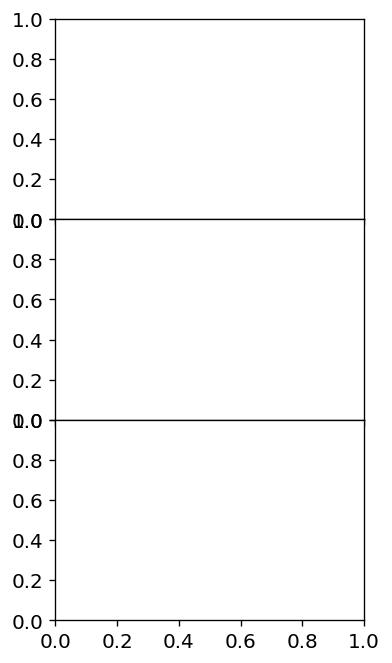

In [33]:
fig,axs = plt.subplots(nrows=3,ncols=1,sharex=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(latex_columnwidth,2*latex_columnwidth)
fig.set_dpi(120)
fig.set_facecolor('white')

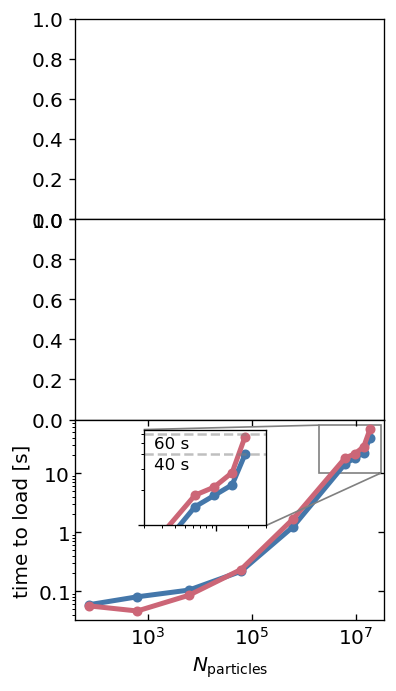

In [34]:
ax = axs[2]


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset

axins = zoomed_inset_axes(ax, zoom=2,bbox_to_anchor=(0.15,0.5,0.5,.5),bbox_transform=ax.transAxes)
axins.plot(ffly_vals[:,0],ffly_vals[:,1],lw=3,c=colors[0],marker='.',markeredgewidth=3)
axins.plot(json_vals[:,0],json_vals[:,1],lw=3,c=colors[1],marker='.',markeredgewidth=3)

axins.set_xlim(2e6,3e7)
axins.set_ylim(10,65)
axins.tick_params(labelleft=False,labelbottom=False)
nameAxes(axins,None,None,None,logflag=(1,1))
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

ax.plot(ffly_vals[:,0],ffly_vals[:,1],lw=3,c=colors[0],marker='.',markeredgewidth=3)
ax.plot(json_vals[:,0],json_vals[:,1],lw=3,c=colors[1],marker='.',markeredgewidth=3)
ax.set_yticks([0,20,40,60])
nameAxes(ax,None,'$N_\mathrm{particles}$','time to load [s]',logflag=(1,1))
ax.tick_params(top=True,labeltop=False)
ax.tick_params(right=True,labelright=False,direction='in')
axins.axhline(60,ls='--',alpha=0.5,c='gray')
axins.text(2.5e6,57,'60 s',va='top',fontsize=10)
axins.axhline(40,ls='--',alpha=0.5,c='gray')
axins.text(2.5e6,38,'40 s',va='top',fontsize=10)
fig

In [35]:
ax = axs[1]
ax.plot(ffly_vals[:,0],ffly_vals[:,2]*1024,lw=3,c=colors[0],marker='.',markeredgewidth=3)
ax.plot(json_vals[:,0],json_vals[:,2]*1024,lw=3,c=colors[1],marker='.',markeredgewidth=3)
#ax.text(ffly_vals[0,0],ffly_vals[0,2]*1024,'.ffly',va='top')
#ax.text(json_vals[0,0],json_vals[0,2]*1024+3,'.json',va='bottom',ha='left')

nameAxes(ax,None,'$N_\mathrm{particles}$','memory [MB]',
         logflag=(1,1))
ax.set_yticks([10,100,1000])
ax.tick_params(top=True,labeltop=False)
ax.tick_params(right=True,labelright=False,direction='in')

saving: /Users/agurvich Desktop/performance.pdf


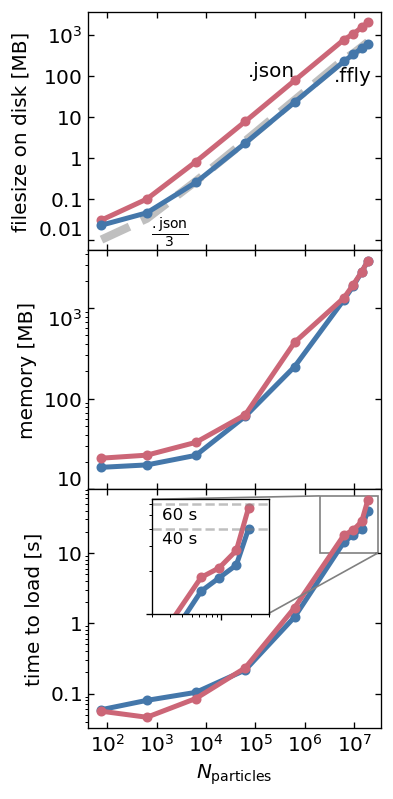

In [36]:
ax = axs[0]

ax.plot(json_disk_sizes[:,0],json_disk_sizes[:,1]/1024**2,label='.json',lw=3,c=colors[1],marker='.',markeredgewidth=3)
ax.plot(json_disk_sizes[:,0],json_disk_sizes[:,1]/1024**2/3,label='.json/3',lw=5,c='gray',alpha=0.5,ls='--')
ax.plot(ffly_disk_sizes[:,0],ffly_disk_sizes[:,1]/1024**2,label='.ffly',lw=3,c=colors[0],marker='.',markeredgewidth=3)

    
ax.text(ffly_disk_sizes[-3,0],ffly_disk_sizes[-3,1]/1024**2/2,'.ffly',va='top',ha='center')
ax.text(json_disk_sizes[-5,0],json_disk_sizes[-5,1]/1024**2,'.json',va='bottom',ha='right')
ax.text(json_disk_sizes[1,0]*1.2,json_disk_sizes[1,1]/1024**2/3*1.2,r'$\frac{\mathrm{.json}}{3}$',va='top',ha='left')
nameAxes(
    ax,
    None,
    '$N_\mathrm{particles}$',
    'filesize on disk [MB]',
    logflag=(1,1))
fig.set_facecolor('white')
fig.set_size_inches(latex_columnwidth,latex_columnwidth*3)
ax.set_xticks(10**np.array([2,3,4,5,6,7]))
ax.set_xticklabels(["$10^{%d}$"%power for power in [2,3,4,5,6,7]])
ax.set_yticks([0.01,0.1,1,10,100,1000])
bufferAxesLabels(axs,3,1)
clean_savefig(fig,'Desktop/performance.pdf',latex_columnwidth,latex_columnwidth*2,plotdir=os.environ['HOME'])
ax.tick_params(top=True,labeltop=False)
ax.tick_params(right=True,labelright=False,direction='in')
fig

In [40]:
this_pg = reader.particleGroups[0]


Gas - 622573/6225729 particles - 4 tracked fields

In [56]:
import time

In [116]:
dec_factors = [1e4,1e3,1e2,10,3,2,1]
maxes = [1e5,1e4,1e3]

durations = np.zeros((len(dec_factors),len(maxes)))
nnodess = np.zeros((len(dec_factors),len(maxes)))
npointss = np.zeros(len(dec_factors))

for i,dec_factor in enumerate(dec_factors):
    this_pg.decimation_factor = int(dec_factor)
    this_pg.getDecimationIndexArray()
    for j,this_max in enumerate(maxes):
        init_time = time.time()
        this_pg.createOctree(npart_max_node=3e5)
        duration = time.time()-init_time
        nnodess[i,j] = len(this_pg.octree.node_list)
        durations[i,j] = duration

    npointss[i] = this_pg.octree.nodes[''].npoints
    print(durations)

Bulding octree of 622 points
0.00%	...done!
adding 1 'outliers' to root node's buffer.
Bulding octree of 622 points
0.00%	...done!
adding 1 'outliers' to root node's buffer.
Bulding octree of 622 points
0.00%	...done!
adding 1 'outliers' to root node's buffer.
[[0.06758189 0.06427813 0.06268072]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
Bulding octree of 6224 points
0.00%	...done!
adding 2 'outliers' to root node's buffer.
Bulding octree of 6224 points
0.00%	...done!
adding 2 'outliers' to root node's buffer.
Bulding octree of 6224 points
0.00%	...done!
adding 2 'outliers' to root node's buffer.
[[0.06758189 0.06427813 0.06268072]
 [0.07351398 0.07353377 0.07495499]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.  

In [117]:
durations

array([[6.75818920e-02, 6.42781258e-02, 6.26807213e-02],
       [7.35139847e-02, 7.35337734e-02, 7.49549866e-02],
       [1.82182789e-01, 1.84651136e-01, 1.93768024e-01],
       [2.74122691e+00, 2.84381795e+00, 2.80225873e+00],
       [1.29875171e+01, 1.36071970e+01, 1.35342970e+01],
       [2.56795650e+01, 2.64709430e+01, 2.59041970e+01],
       [6.70252619e+01, 6.78593853e+01, 6.47586098e+01]])

In [106]:
dec_factors

[10000.0, 1000.0, 100.0, 10, 3, 2, 1]

saving: /Users/agurvich Desktop/octree.pdf


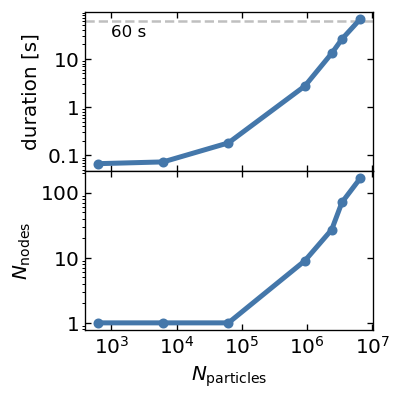

In [140]:
fig,axs = plt.subplots(nrows=2,ncols=1,sharex=True)
axs = np.array(axs).flatten()
fig.set_size_inches(latex_columnwidth,latex_columnwidth)
fig.set_dpi(120)
fig.subplots_adjust(hspace=0,wspace=0)
colors = get_distinct(2)#len(maxes))
axs[0].axhline(60,ls='--',c='gray',alpha=0.5)
axs[0].text(1e3,50,'60 s',va='top',fontsize=10)

xs = npointss
for j,this_max in enumerate(maxes[:1]):
    ys = durations[:,j]
    axs[0].plot(xs,ys,lw=3,c=colors[j],marker='.',markeredgewidth=3)

nameAxes(axs[0],None,None,'duration [s]',logflag=(1,1))    
for j,this_max in enumerate(maxes[:1]):
    xs = npointss#nnodess[:,j]
    ys = nnodess[:,j]
    axs[1].plot(xs,ys,lw=3,c=colors[j],marker='.',markeredgewidth=3)
    
nameAxes(axs[1],None,'$N_\mathrm{particles}$','$N_\mathrm{nodes}$',logflag=(1,1))
for ax in axs:
    ax.set_xticks(10**np.array([3,4,5,6,7]))
    ax.set_xticklabels(["$10^{%d}$"%power for power in [3,4,5,6,7]])
    ax.tick_params(top=True,labeltop=False)
    ax.tick_params(right=True,labelright=False,direction='in')
clean_savefig(fig,'Desktop/octree.pdf',latex_columnwidth,latex_columnwidth,plotdir=os.environ['HOME'])